<a href="https://colab.research.google.com/github/LaurenzR/LaurenzR.github.io/blob/master/Final_Project_Laurenz_Rothweiler_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Citibike Analysis - cont'd

Since the session crashed with full-year data, I am continuing here with data for May 2018 only

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

tripdata05 = pd.read_csv('201805-citibike-tripdata.csv')
tripdata05.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [2]:
tripdata = tripdata05.copy()
tripdata.shape

(1824710, 15)

In [3]:
tripdata.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

In [4]:
tripdata.dropna(how='any', inplace=True)
tripdata.shape

(1824710, 15)

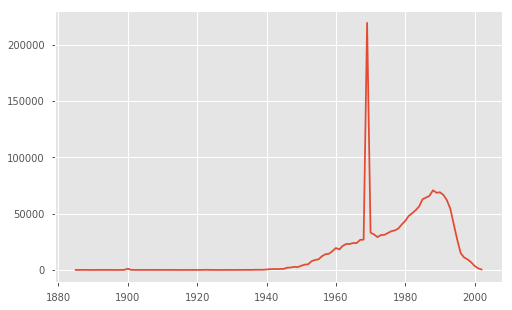

In [5]:
plt.style.use('seaborn-notebook')
plt.style.use('ggplot')

plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.size'] = 14
plt.plot(tripdata['birth year'].value_counts().sort_index())

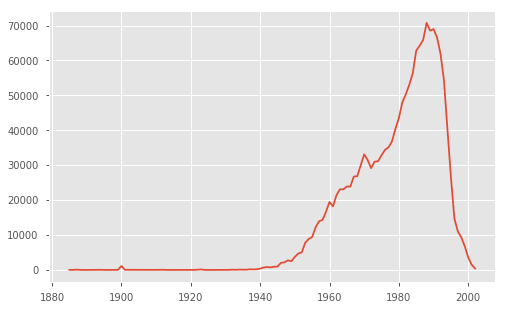

In [6]:
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.size'] = 14
plt.plot(tripdata[tripdata['birth year'] != 1969]['birth year'].value_counts().sort_index())

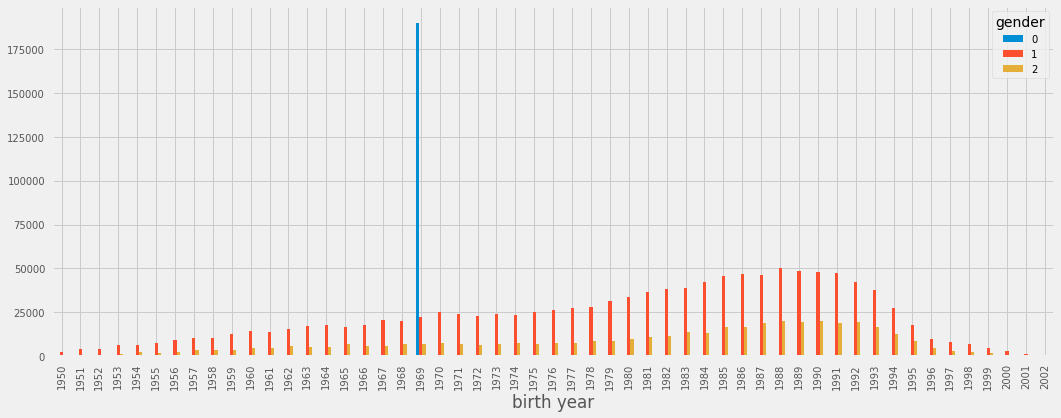

In [7]:
plt.style.use('fivethirtyeight')
by_year_gender = tripdata[tripdata['birth year']>1949].groupby(['birth year','gender'])
year_gen_sz = by_year_gender.size().unstack()
year_gen_sz.plot(kind='bar', figsize=(16,6))

Checking gender data and dropping rows with a value of 0 (meaning gender unknown)

In [8]:
print(tripdata['gender'].value_counts())

indexgenderunknown = tripdata[tripdata['gender'] == 0].index

tripdata.drop(indexgenderunknown, inplace=True)

print(tripdata['gender'].value_counts())

1    1203816
2     421304
0     199590
Name: gender, dtype: int64
1    1203816
2     421304
Name: gender, dtype: int64


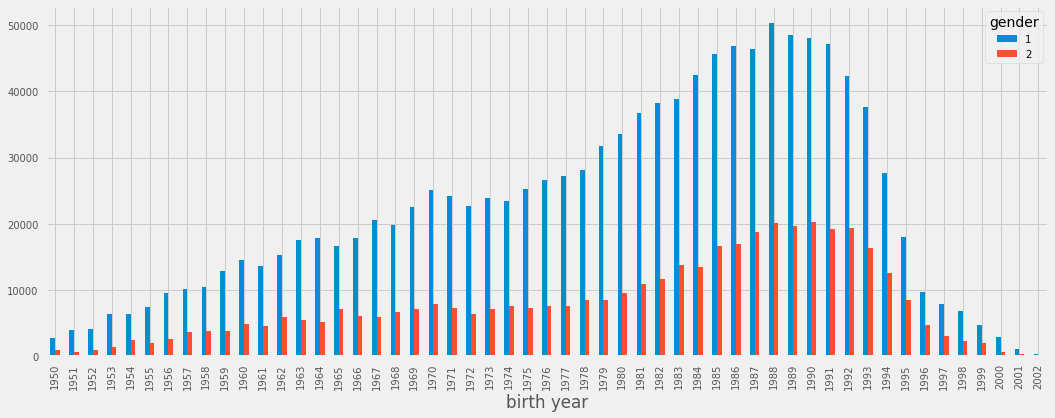

In [9]:
by_year_gender = tripdata[tripdata['birth year']>1949].groupby(['birth year','gender'])
year_gen_sz = by_year_gender.size().unstack()
year_gen_sz.plot(kind='bar', figsize=(16,6))

There are no unknown or blanks for the usertype (at least after deleting gender = 0 in the last step):

In [10]:
print(tripdata['usertype'].value_counts())

Subscriber    1550250
Customer        74870
Name: usertype, dtype: int64


### Calculate distance between start and stop
Adding distance to the tripdata dataframe as 'tripdistance'

In [0]:
import math

def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 3959 # miles
    
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) ** 2 + math.cos(math.radians(lat1)) \
    * math.cos(math.radians(lat2)) * math.sin(dlon/2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
    
    return d

In [12]:
tripdistance=[]
tripdistancerounded=[]


for i in tripdata.values:
  dist = distance((i[5],i[6]),(i[9],i[10]))
  distrounded = round(dist)
  tripdistance.append(dist)
  tripdistancerounded.append(distrounded)

tripdistancepd = pd.Series(tripdistance)
tripdistanceroundedpd = pd.Series(tripdistancerounded)
  
tripdata['tripdistance'] = tripdistancepd

tripdata['tripdistancerounded'] = tripdistanceroundedpd

tripdata.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripdistance,tripdistancerounded
0,367,2018-05-01 05:06:16.5840,2018-05-01 05:12:23.9650,72,W 52 St & 11 Ave,40.767272,-73.993929,514,12 Ave & W 40 St,40.760875,-74.002777,30567,Subscriber,1965,1,0.640157,1.0
1,1313,2018-05-01 06:25:49.4250,2018-05-01 06:47:42.7120,72,W 52 St & 11 Ave,40.767272,-73.993929,426,West St & Chambers St,40.717548,-74.013221,18965,Subscriber,1956,1,3.581161,4.0
2,1798,2018-05-01 06:40:26.4450,2018-05-01 07:10:25.1790,72,W 52 St & 11 Ave,40.767272,-73.993929,3435,Grand St & Elizabeth St,40.718822,-73.995960,30241,Subscriber,1959,2,3.349477,3.0
3,518,2018-05-01 07:06:02.9730,2018-05-01 07:14:41.0040,72,W 52 St & 11 Ave,40.767272,-73.993929,477,W 41 St & 8 Ave,40.756405,-73.990026,28985,Subscriber,1986,1,0.778147,1.0
4,109,2018-05-01 07:26:32.3450,2018-05-01 07:28:21.5420,72,W 52 St & 11 Ave,40.767272,-73.993929,530,11 Ave & W 59 St,40.771522,-73.990541,14556,Subscriber,1991,1,0.343022,0.0


### Converting starttime and stoptime to datetime format
And adding the hour of starttime as 'starttimehour'

starttime and stoptime are objects (or strings), which I need to convert to dates and times

In [13]:
tripdata.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                   int64
gender                       int64
tripdistance               float64
tripdistancerounded        float64
dtype: object

In [14]:
tripdata['starttime'] = pd.to_datetime(tripdata.starttime)
tripdata['stoptime'] = pd.to_datetime(tripdata.stoptime)
tripdata['starttimehour'] = tripdata['starttime'].dt.hour
tripdata['weekday'] = tripdata['starttime'].dt.weekday

tripdata.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripdistance,tripdistancerounded,starttimehour,weekday
0,367,2018-05-01 05:06:16.584,2018-05-01 05:12:23.965,72,W 52 St & 11 Ave,40.767272,-73.993929,514,12 Ave & W 40 St,40.760875,-74.002777,30567,Subscriber,1965,1,0.640157,1.0,5,1
1,1313,2018-05-01 06:25:49.425,2018-05-01 06:47:42.712,72,W 52 St & 11 Ave,40.767272,-73.993929,426,West St & Chambers St,40.717548,-74.013221,18965,Subscriber,1956,1,3.581161,4.0,6,1
2,1798,2018-05-01 06:40:26.445,2018-05-01 07:10:25.179,72,W 52 St & 11 Ave,40.767272,-73.993929,3435,Grand St & Elizabeth St,40.718822,-73.995960,30241,Subscriber,1959,2,3.349477,3.0,6,1
3,518,2018-05-01 07:06:02.973,2018-05-01 07:14:41.004,72,W 52 St & 11 Ave,40.767272,-73.993929,477,W 41 St & 8 Ave,40.756405,-73.990026,28985,Subscriber,1986,1,0.778147,1.0,7,1
4,109,2018-05-01 07:26:32.345,2018-05-01 07:28:21.542,72,W 52 St & 11 Ave,40.767272,-73.993929,530,11 Ave & W 59 St,40.771522,-73.990541,14556,Subscriber,1991,1,0.343022,0.0,7,1


In [15]:
tripdata.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id                    int64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                      int64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                           object
birth year                          int64
gender                              int64
tripdistance                      float64
tripdistancerounded               float64
starttimehour                       int64
weekday                             int64
dtype: object

## Comparison between Men and Women

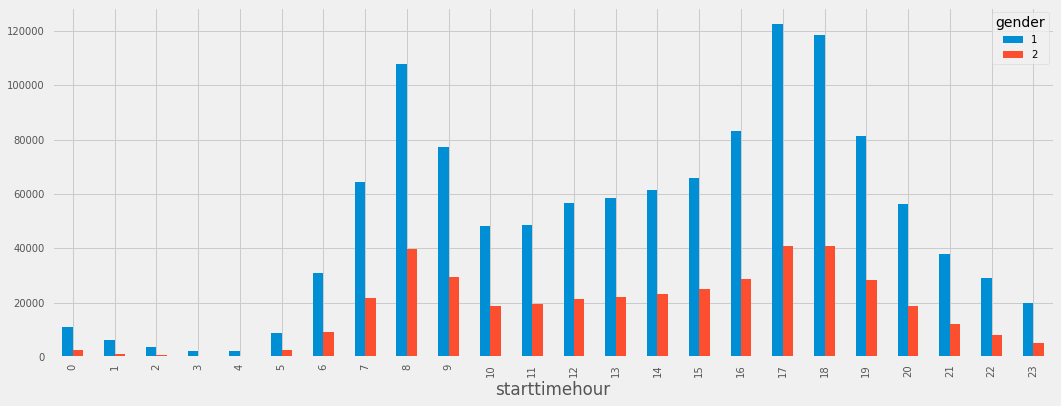

In [16]:
by_starttimehour_gender = tripdata.groupby(['starttimehour','gender'])
starttimehour_gen_sz = by_starttimehour_gender.size().unstack()
starttimehour_gen_sz.plot(kind='bar', figsize=(16,6))

To really compare the data for gender patterns, I am normalizing the data by proportionately increasing female rides to match the male rides.

It shows that men are a bit more likely to ride in the evening and at night, but the difference is not stark:

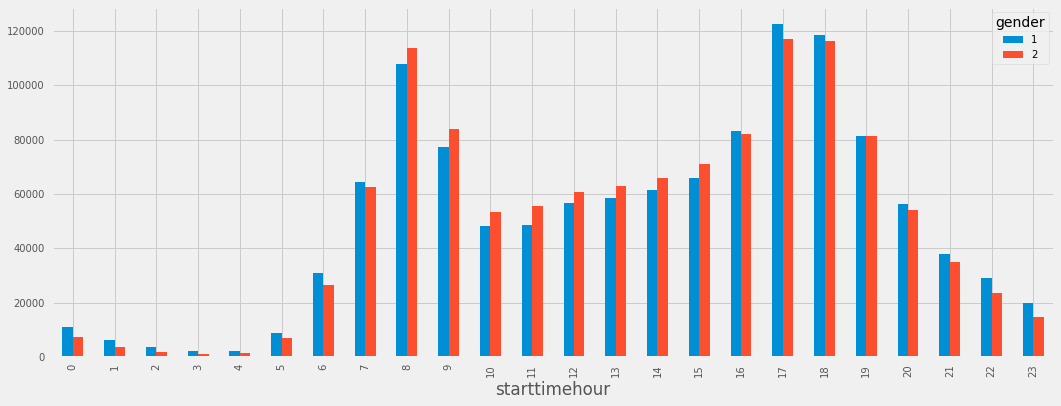

In [17]:
by_starttimehour_gender = tripdata.groupby(['starttimehour','gender'])
starttimehour_gen_sz = by_starttimehour_gender.size().unstack()

starttimehour_gen_sz[2] = starttimehour_gen_sz[2] / 421304 * 1203816

starttimehour_gen_sz.plot(kind='bar', figsize=(16,6))

A similarly normalized chart for distance shows no differenc between men and women

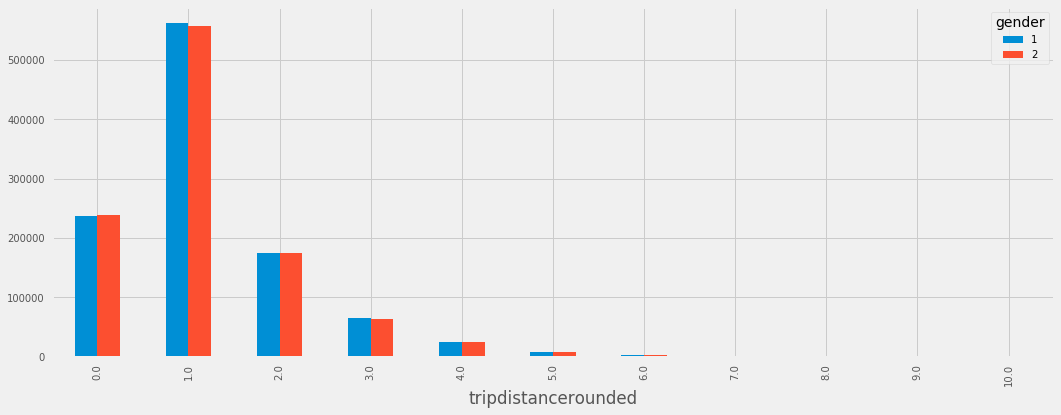

In [18]:
by_dist_gender = tripdata.groupby(['tripdistancerounded','gender'])
dist_gen_sz = by_dist_gender.size().unstack()

dist_gen_sz[2] = dist_gen_sz[2] / 421304 * 1203816

dist_gen_sz.plot(kind='bar', figsize=(16,6))

A similarly normalized chart for days of the week shows only little difference between men and women:

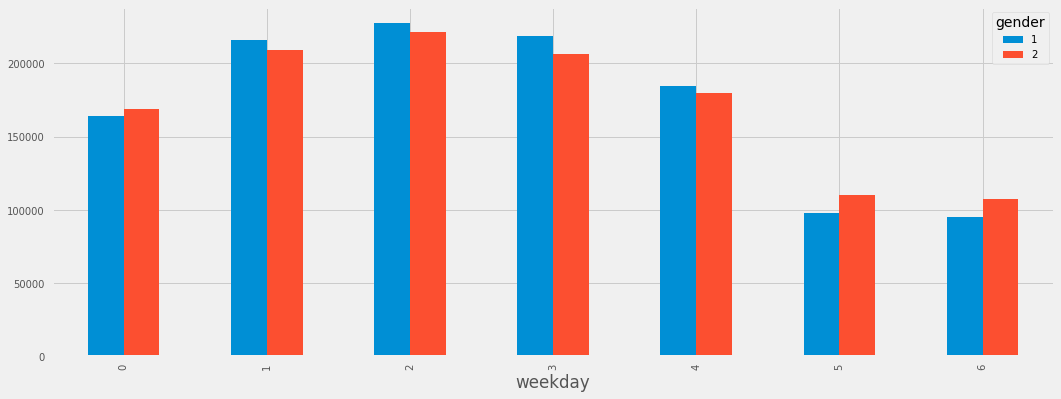

In [19]:
by_weekday_gender = tripdata.groupby(['weekday','gender'])
weekday_gen_sz = by_weekday_gender.size().unstack()

weekday_gen_sz[2] = weekday_gen_sz[2] / 421304 * 1203816

weekday_gen_sz.plot(kind='bar', figsize=(16,6))

##Of course, this would need more analysis, but at least the initial conclusion is that while rides by men outnumber rides by women 3 to 1, the rider patterns between men and women are fairly similar.